In [1]:
import numpy as np
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
# Set up folder with data:
os.chdir('D:\\01_PROJECTS_sripts_code\\Electricty_Demand\\02_FORECAST')

In [3]:
#%% Function to extract code from GitHub:
def GetGitHubCode(GitUrl):

    response = requests.get(GitUrl) #get data from json file located at specified URL 

    if response.status_code == requests.codes.ok:
        contentOfUrl = response.content
        exec(contentOfUrl, globals() )
    else:
        print('Content was not found.')

In [4]:
# Download functions from GitHub:
GitUrl__Prepare_Data_For_Regression = 'https://raw.githubusercontent.com/kamilbanas85/Phyton_usefull_functions/main/Prepare_Data_For_Regression.py'
GetGitHubCode(GitUrl__Prepare_Data_For_Regression)

GitUrl__Make_TS_Regression = 'https://raw.githubusercontent.com/kamilbanas85/Phyton_usefull_functions/main/Make_TS_Regression.py'
GetGitHubCode(GitUrl__Make_TS_Regression)

GitUrl__Goodness_Of_Fit = 'https://raw.githubusercontent.com/kamilbanas85/Phyton_usefull_functions/main/Goodness_Of_Fit.py'
GetGitHubCode(GitUrl__Goodness_Of_Fit)

GitUrl__Multicollinearity_Check_Functions= 'https://raw.githubusercontent.com/kamilbanas85/Phyton_usefull_functions/main/Multicollinearity_Check_Functions.py'
GetGitHubCode(GitUrl__Multicollinearity_Check_Functions)

In [5]:
# Read Analysis Data:
AnalysisData = pd.read_csv('AnalysisDF.csv',
                           parse_dates =['Date'],
                           index_col = 'Date')

AnalysisData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63552 entries, 2015-07-01 01:00:00 to 2022-09-30 00:00:00
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Demand               63552 non-null  float64
 1   air_temperature      63552 non-null  float64
 2   humidity             63552 non-null  float64
 3   sky_cover            63552 non-null  float64
 4   wind_speed           63552 non-null  float64
 5   Population           63552 non-null  float64
 6   RealGDP              63552 non-null  float64
 7   DallasFedManufIndex  63552 non-null  float64
 8   WorkDay              63552 non-null  int64  
 9   hour                 63552 non-null  int64  
 10  day                  63552 non-null  int64  
 11  week                 63552 non-null  int64  
 12  month                63552 non-null  int64  
 13  HDD                  63552 non-null  int64  
 14  CDD                  63552 non-null  int64  
dtypes

In [6]:
##########################################################
##########################################################
#%% Prepare data
##########################################################
##########################################################

In [7]:
# Select Main Data
Dependent_Var = 'Demand'

Independent_Vars = ['HDD',
                    'CDD',
                    'wind_speed',
                    'humidity',
                    'sky_cover',
#                   'Population',
                    'RealGDP',
                    'DallasFedManufIndex',
                    'WorkDay',
                    'hour',
#                   'day',
                    'week'
#                   'month'
                   ]

DummyForColumn = ['hour','week']
LagList = None

In [8]:
### Cut data to pre-Covid time and crate 2 datasets to show diffrence between a summer and winter predictions

In [9]:
###################
#%% '01' model on winter time
###################

In [10]:
AnalysisData_01 = AnalysisData.loc[:'2020-02']

In [11]:
TestSetDate_01 = '2019-09'

In [12]:
# Prepare Data For Linear Regression
X_01, y_01 =  DevideOnXandY_CreateDummies(AnalysisData_01, 
                                          DependentVar = Dependent_Var,
                                          IndependentVar = Independent_Vars,
                                          DummyForCol = DummyForColumn)

X_Train_01, y_Train_01,\
X_Test_01, y_Test_01 =\
            PrepareDataForRegression(X_01, y_01, 
                                     TestSplitInd = TestSetDate_01,
                                     ValSplitInd = None,     
                                     ScalerType = None,
                                     ScalerRange = None,                             
                                     BatchSize = None,
                                     WindowLength = 1)

In [13]:
###################
#%% '02' model on summer time
###################

In [14]:
AnalysisData_02 = AnalysisData.loc[:'2019-07']

In [15]:
TestSetDate_02 = '2019-02'

In [16]:
# Prepare Data For Linear Regression
X_02, y_02 =  DevideOnXandY_CreateDummies(AnalysisData_02, 
                                          DependentVar = Dependent_Var,
                                          IndependentVar = Independent_Vars,
                                          DummyForCol = DummyForColumn)

X_Train_02, y_Train_02,\
X_Test_02, y_Test_02 =\
        PrepareDataForRegression(X_02, y_02, 
                                 TestSplitInd = TestSetDate_02,
                                 ValSplitInd = None,     
                                 ScalerType = None,
                                 ScalerRange = None,                             
                                 BatchSize = None,
                                 WindowLength = 1)

In [17]:
##########################################################
##########################################################
#%% FIT MODEL - Train Set
##########################################################
##########################################################

In [18]:
###################
#%% '01' model on winter time
###################

In [19]:
AddIntercept = True
ModelLR_01 = sm.OLS( y_Train_01, sm.add_constant(X_Train_01) )

ModelLRFitted_01 = ModelLR_01.fit()

# Check model
ModelLRFitted_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Demand   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     3962.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:02:18   Log-Likelihood:            -3.4562e+05
No. Observations:               36551   AIC:                         6.914e+05
Df Residuals:                   36467   BIC:                         6.921e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -365.7595    563.700     -0.649      0.516   -1470.627     739.108
HDD                   644.6039      5.378    119.860      0.000     634.063     655.145
CDD                  1182.5662      6.884    171.790      0.000    1169.074    1196.059
wind_speed             67.5171      2.962     22.798      0.000      61.712      73.322
humidity               19.2947      1.314     14.683      0.000      16.719      21.870
sky_cover               4.1452      0.545      7.605      0.000       3.077       5.214
RealGDP                 0.0184      0.000     56.737      0.000       0.018       0.019
DallasFedManufIndex    16.9294      1.004     16.864      0.000      14.962      18.897
WorkDay              2026.6547     35.179     57.610      0.000    1957.703    2095.606
hour__1             -2280.5071    112.239    -20.318      0.000   -2500.498   -2060.516
hour__2             -3804.0896    112.279    -33.881      0.000   -4024.159   -3584.020
hour__3             -4682.5892    112.380    -41.668      0.000   -4902.857   -4462.321
hour__4             -5048.3402    112.889    -44.720      0.000   -5269.606   -4827.075
hour__5             -4888.3358    112.920    -43.290      0.000   -5109.662   -4667.010
hour__6             -3577.3519    112.988    -31.661      0.000   -3798.811   -3355.892
hour__7             -1617.7111    112.795    -14.342      0.000   -1838.792   -1396.630
hour__8             -1024.8262    112.533     -9.107      0.000   -1245.395    -804.258
hour__9              -844.4169    114.577     -7.370      0.000   -1068.992    -619.842
hour__10              143.0001    115.544      1.238      0.216     -83.470     369.470
hour__11             1126.1178    117.243      9.605      0.000     896.318    1355.918
hour__12             2004.9303    118.087     16.978      0.000    1773.477    2236.383
hour__13             2723.5874    118.872     22.912      0.000    2490.594    2956.580
hour__14             3504.5147    119.713     29.274      0.000    3269.874    3739.155
hour__15             3884.2263    121.304     32.021      0.000    3646.467    4121.986
hour__16             4917.0477    119.589     41.116      0.000    4682.650    5151.445
hour__17             5616.6973    118.849     47.259      0.000    5383.750    5849.645
hour__18             6387.6519    117.609     54.313      0.000    6157.135    6618.169
hour__19             6855.7506    116.399     58.898      0.000    6627.604    7083.897
hour__20             6636.0404    114.989     57.710      0.000    6410.658    6861.423
hour__21             6594.1092    112.535     58.596      0.000    6373.537    6814.681
hour__22             5255.3790    112.366     46.770      0.000    5035.139    5475.619
hour__23             2757.1710    112.245     24.564      0.000    2537.168    2977.174
wee

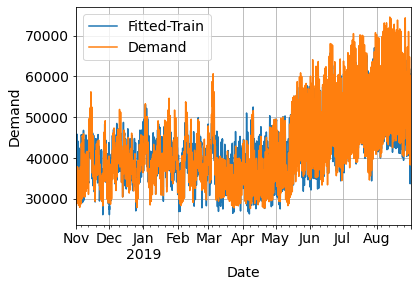

In [20]:
# Plot fitted model
ModelLRFitted_01.fittedvalues.rename('Fitted-Train').to_frame()\
    .join(y_Train_01)\
    .loc['2018-11':'2019-09']\
    .plot()

plt.ylabel('Demand', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [21]:
###################
#%% '02' model on summer time
###################

In [22]:
AddIntercept = True
ModelLR_02 = sm.OLS( y_Train_02, sm.add_constant(X_Train_02) )

ModelLRFitted_02 = ModelLR_02.fit()

In [23]:
##########################################################
##########################################################
#%% Check Model - Test Set
##########################################################
##########################################################

In [24]:
###################
#%% test '01' model on winter time
###################

In [25]:
# Make prediction on test set
yhat_Test_LR_01, X_Test_withLags = \
   MakeTSforecast(X_Test_01, ModelLRFitted_01,\
                  DependentVar = Dependent_Var,
                  Intecept = AddIntercept,
                  LagsList = LagList,
                  Scaler_y = None, Scaler_X = None,
                  Test_or_Forecast = 'Test')

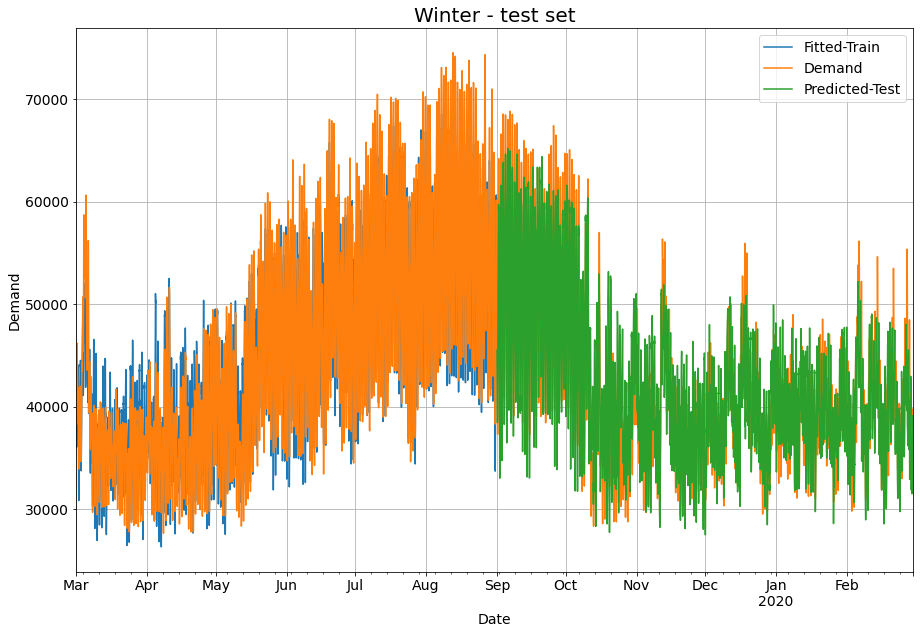

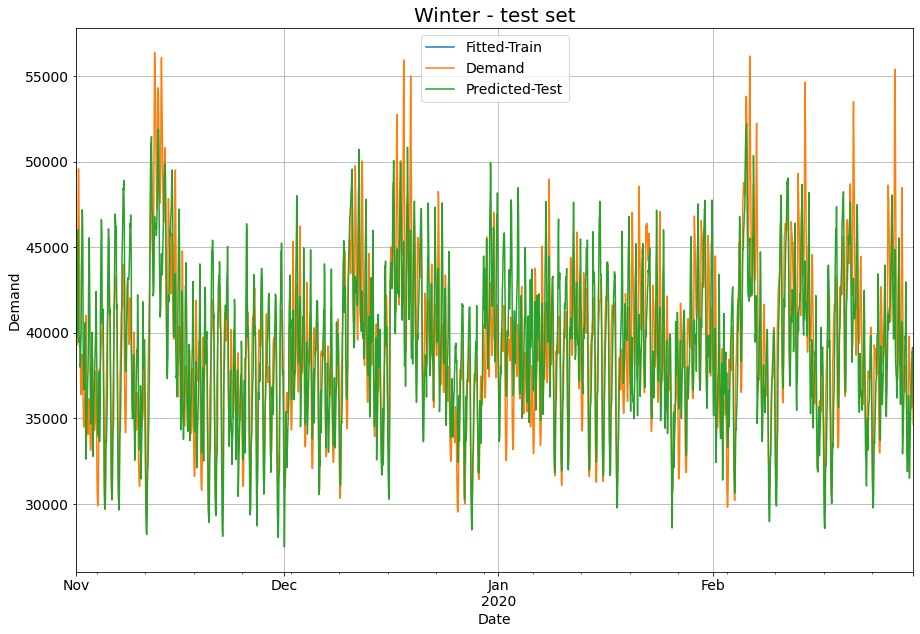

In [26]:
# Plot Fitted Data
ModelLRFitted_01.fittedvalues.rename('Fitted-Train').to_frame()\
        .join(y_Train_01)\
        .append( yhat_Test_LR_01.join(y_Test_01) )\
        .loc['2019-03':]\
        .plot()

plt.ylabel('Demand', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Winter - test set', fontsize=20)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

ModelLRFitted_01.fittedvalues.rename('Fitted-Train').to_frame()\
        .join(y_Train_01)\
        .append( yhat_Test_LR_01.join(y_Test_01) )\
        .loc['2019-11':]\
        .plot()

plt.ylabel('Demand', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Winter - test set', fontsize=20)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [27]:
print( CalculateR2andR2adj(y_Test_01, yhat_Test_LR_01, X_Test_01, const = AddIntercept) )
print('')
print( f'MAE:  {round(mean_absolute_error(y_Test_01, yhat_Test_LR_01),2)}'  )
print( f'MAPE: {round(mean_absolute_percentage_error(y_Test_01, yhat_Test_LR_01)*100,2)}' )
print( f'RSME: {round(np.sqrt(mean_squared_error(y_Test_01, yhat_Test_LR_01)),2)}' )

R2: 0.8136
R2_adj: 0.81
(0.8136, 0.81)

MAE:  2670.2
MAPE: 6.49
RSME: 3368.83


In [28]:
###################
#%% test '02' model on  summer time
###################

In [29]:
# Make prediction on test set
yhat_Test_LR_02, X_Test_withLags = \
   MakeTSforecast(X_Test_02, ModelLRFitted_02,\
                  DependentVar = Dependent_Var,
                  Intecept = AddIntercept,
                  LagsList = LagList,
                  Scaler_y = None, Scaler_X = None,
                  Test_or_Forecast = 'Test')

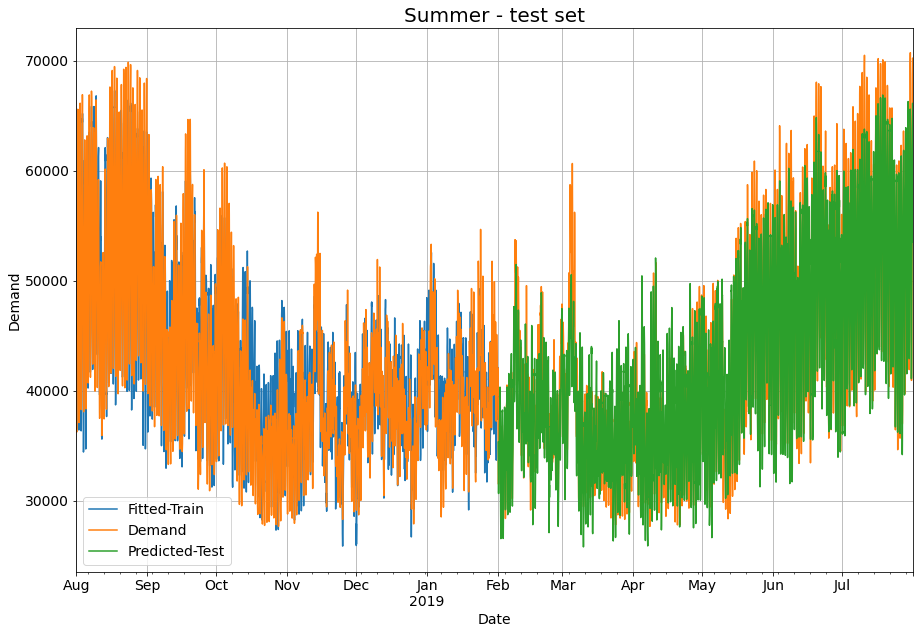

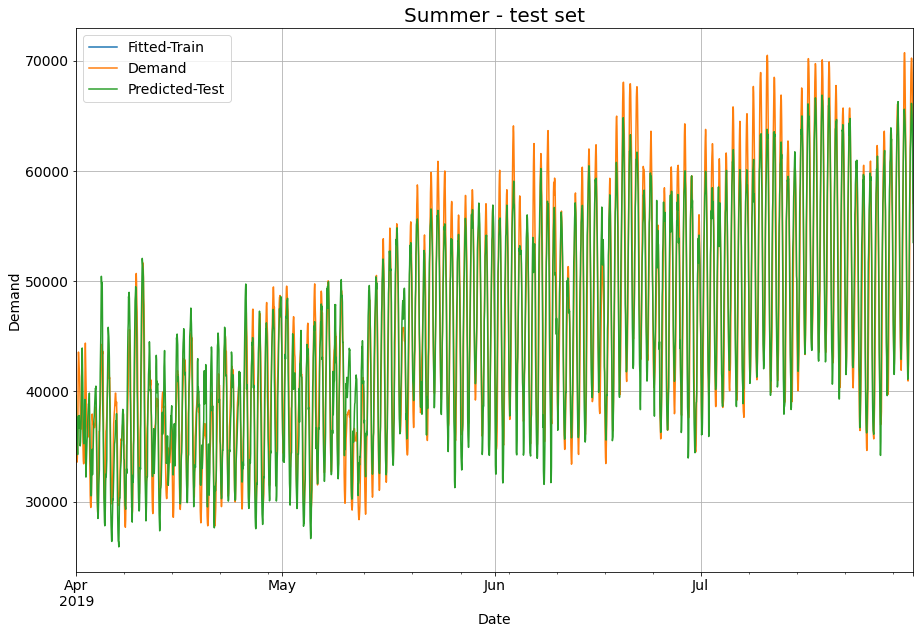

In [30]:
# Plot Fitted Data
ModelLRFitted_02.fittedvalues.rename('Fitted-Train').to_frame()\
        .join(y_Train_02)\
        .append( yhat_Test_LR_02.join(y_Test_02) )\
        .loc['2018-08':]\
        .plot()

plt.ylabel('Demand', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Summer - test set', fontsize=20)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

ModelLRFitted_02.fittedvalues.rename('Fitted-Train').to_frame()\
        .join(y_Train_02)\
        .append( yhat_Test_LR_02.join(y_Test_02) )\
        .loc['2019-04':]\
        .plot()

plt.ylabel('Demand', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Summer - test set', fontsize=20)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [31]:
print( CalculateR2andR2adj(y_Test_02, yhat_Test_LR_02, X_Test_02, const = AddIntercept) )
print('')
print( f'MAE:  {round(mean_absolute_error(y_Test_02, yhat_Test_LR_02),2)}'  )
print( f'MAPE: {round(mean_absolute_percentage_error(y_Test_02, yhat_Test_LR_02)*100,2)}' )
print( f'RSME: {round(np.sqrt(mean_squared_error(y_Test_02, yhat_Test_LR_02)),2)}' )

R2: 0.888
R2_adj: 0.8858
(0.888, 0.8858)

MAE:  2497.61
MAPE: 5.9
RSME: 3153.17


In [32]:
##########################################################
##########################################################
#%% Check Residuals and OLS assumption
##########################################################
##########################################################

In [33]:
###################
#%% Check AutoCorrelation of residuals
###################

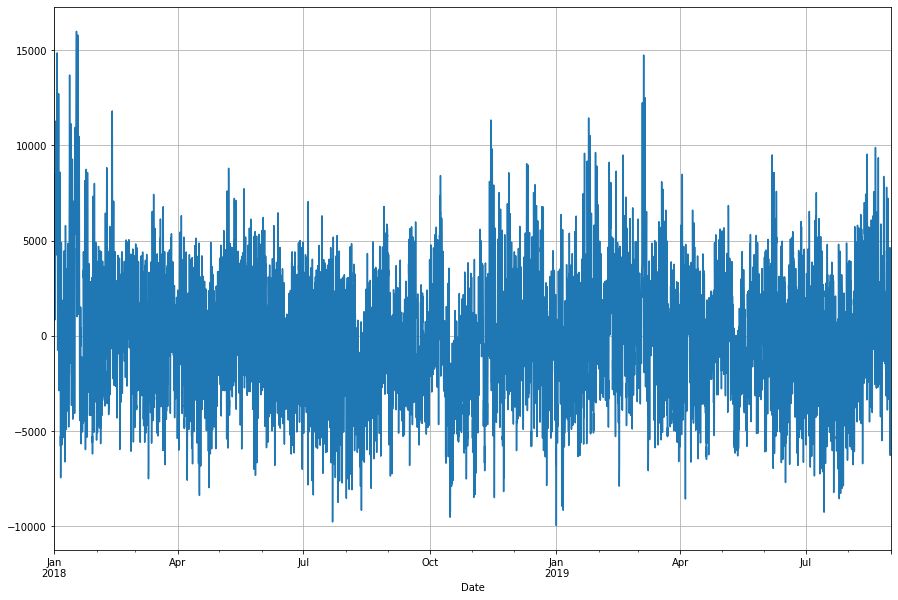

In [34]:
# Plot Resudulas
ModelLRFitted_01.resid.loc['2018':].plot()
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

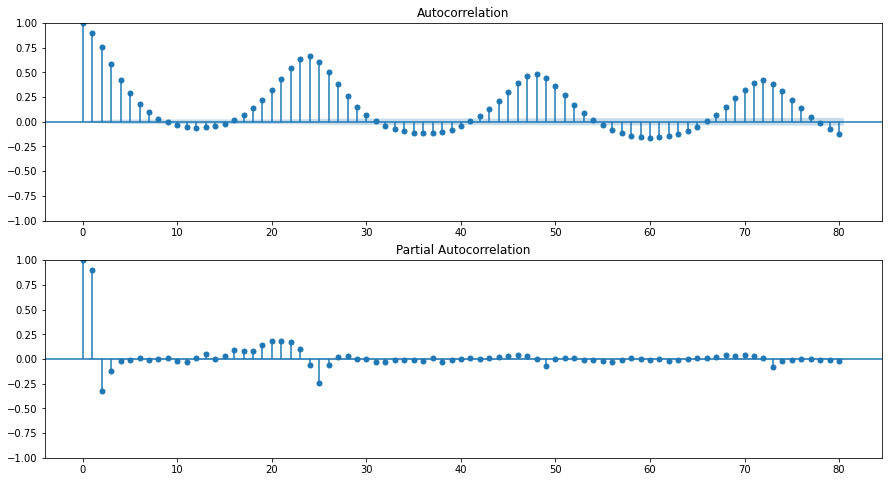

In [35]:
# plot autocorelogram
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,1, figsize=(15,8))
fig = plot_acf(ModelLRFitted_01.resid, lags=80, ax=ax[0])
fig = plot_pacf(ModelLRFitted_01.resid, lags=80, ax=ax[1], method='ywm')
plt.show()

In [36]:
# Durbin-Whatson Test - 1-order autocorrelation
# A value:
#   - 2.0:               no autocorrelation
#   - 0 to less than 2:  positive autocorrelation
#   - from 2 to 4:       negative autocorrelation

In [37]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(ModelLRFitted_01.resid).round(3)

0.195

In [38]:
# To check higher order autocorrelation: Ljung-box test 
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(ModelLRFitted_01.resid)
# H0 - a residuals are independently distributed
# p-values less than 0.05 -> H0 is receted for a lot of lags
# so a higer oreder autocorrelations exists

,lb_stat,lb_pvalue
1,29760.466525,0.0
2,50504.800828,0.0
3,63063.034438,0.0
4,69735.955216,0.0
5,72787.141846,0.0
6,73953.385345,0.0
7,74274.128054,0.0
8,74312.140776,0.0
9,74313.825597,0.0
10,74350.765648,0.0


In [39]:
# Based on ACF, PACF plots and on the statistics we can conlude that residuals are autocorrelated.
# Morover, osicilation of ACF plot indicates seasonality with period 24 which wasn't captured 

In [40]:
###################
#%% Check Heteroskedasticity of residuals
###################

In [41]:
# Breusch-Pagan Lagrange Multiplier test
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

test = het_breuschpagan(ModelLRFitted_01.resid, ModelLRFitted_01.model.exog)
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
lzip(names, test)

# H0: Homoscedasticity is present
# the null hypothesis is rejected if p<0.05, so in this case we reject H0, so Hetercedasity is present

[('Lagrange multiplier statistic', 6925.616106458016),
 ('p-value', 0.0),
 ('f-value', 102.71086161808869),
 ('f p-value', 0.0)]

In [42]:
# Goldfeld-Quandt test
from statsmodels.stats.diagnostic import het_goldfeldquandt

name = ['F statistic', 'p-value']
test = het_goldfeldquandt(ModelLRFitted_01.resid, ModelLRFitted_01.model.exog)
lzip(name, test)
# H0 for the GQ test is homoskedasticity, in our case id rejected

[('F statistic', 1.147780192214278), ('p-value', 7.621124140067893e-21)]

In [43]:
# 2 tests show that Hetercedasity is pronlem of resiaduals 

In [44]:
###################
#%% Check Correalation Between Regressors and Residuals
###################

In [45]:
## The null hypothesis is that the two variables are uncorrelated
## so p-value greater than 0.05 support uncorrelation
from scipy.stats import pearsonr

resultsLIST = []
for columnName in X_Train_01.columns:

    CorrRegressVsResidDF_temp =\
        pd.DataFrame([pearsonr( ModelLRFitted_01.resid, X_Train_01.loc[:,columnName] )[1].round(4)],\
                     columns = ["p-value"] )
    CorrRegressVsResidDF_temp.index = [columnName]
    resultsLIST.append(CorrRegressVsResidDF_temp)  

results = pd.concat(resultsLIST)

print(results)

            p-value
HDD             1.0
CDD             1.0
wind_speed      1.0
humidity        1.0
sky_cover       1.0
...             ...
week__49        1.0
week__50        1.0
week__51        1.0
week__52        1.0
week__53        1.0

[83 rows x 1 columns]


In [46]:
print( results['p-value'].unique() )

[1.]


In [47]:
# there is no problem with correalation between regressors and residuals 

In [48]:
###################
#%% Check Normality of residuals
###################

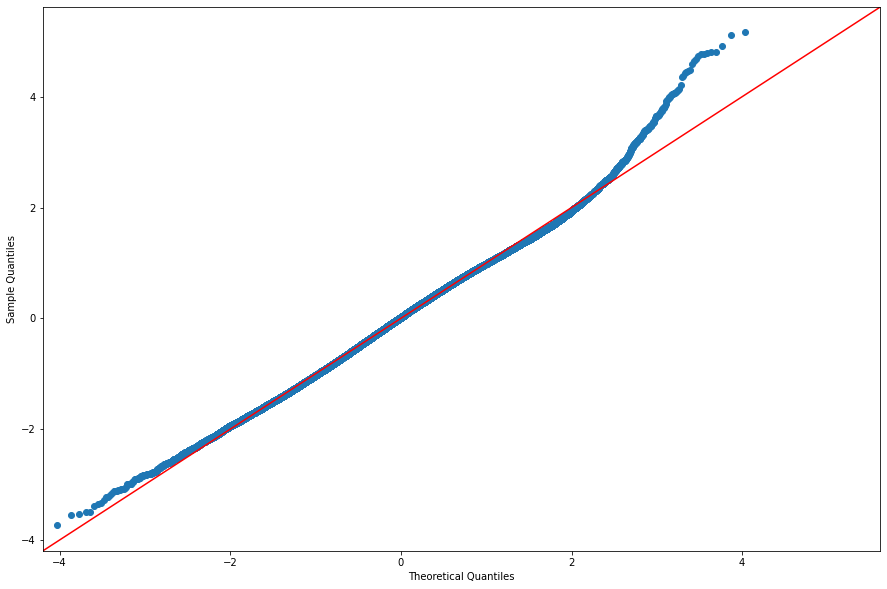

In [49]:
# QQ-Plot of residuals
fig1 = sm.qqplot(ModelLRFitted_01.resid, fit=True, line='45')
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()

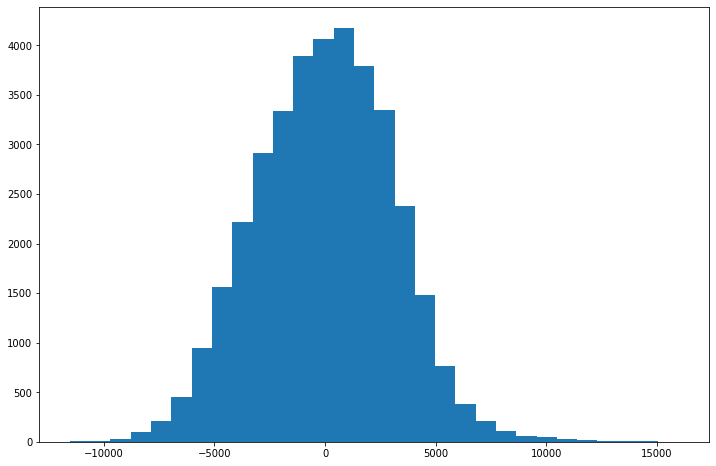

In [50]:
#create a histogram to visualize the distribution
plt.hist(ModelLRFitted_01.resid, 30)
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()

In [1]:
# The is some distortion, however not very big